In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Análisis exploratorio

In [2]:
df = pd.read_csv("./Resources/creditcard.csv")
df.shape

(284807, 31)

Nuestro dataset contiene 284807 operaciones de tarjetas de crédito (cada línea es una operación) durante dos días distintos de septiembre de 2013 y 31 columnas o features.

Ahora vamos a echar un primer vistazo a los datos.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


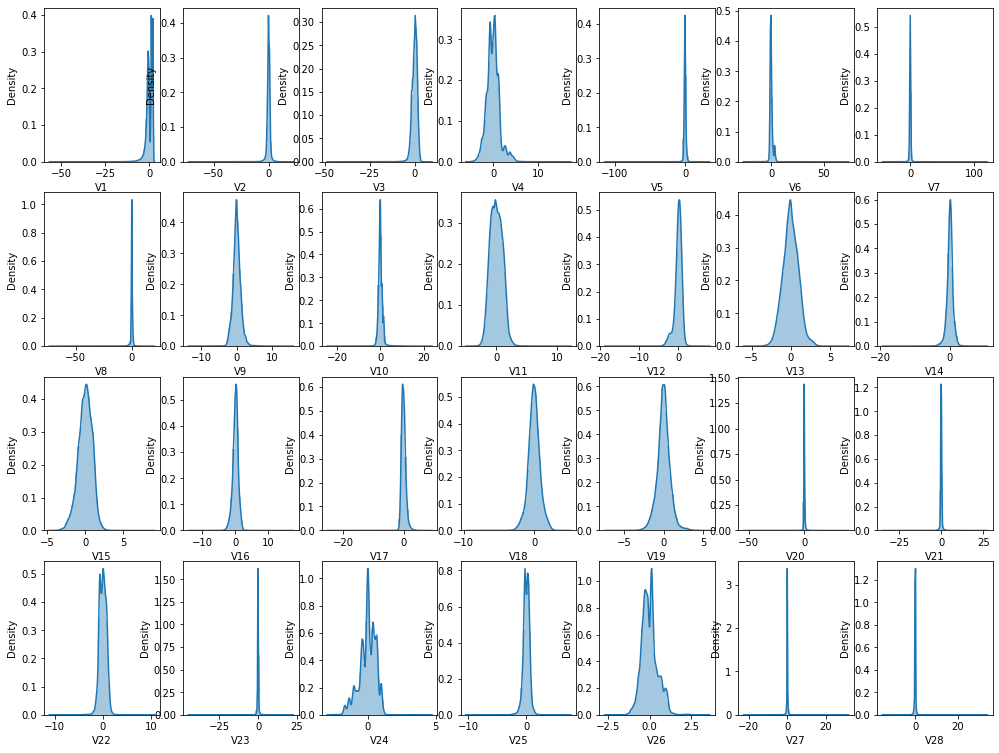

In [5]:
ncols = 7
nrows = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(17,13))

count = 0
for col in df.columns:
    if 'V' in col:
        sns.distplot(df[str(col)], ax=axs[count//ncols, count%ncols])
        count += 1

Atendiendo primero a las features/columnas 'Vx', la media de los valores correspondientes a estas es muy próxima a 0, lo cual se oberva muy bien en los gráficos de la figura de arriba. Por otro lado, algo que me llama la atención es que la desviación típica (std) de estas features disminuye a medida que el número x aumenta, desde 1.96 a 0.33 aproximadamente. Además, fijándonos en los valores máximos y mínimos de estas columnas y en los ejes X de los gráficos vemos como existen algunos valores atípicos.

Con esta información podemos decir que los valores de estas columnas 'Vx' parecen seguir una **distribución normal**, es decir, la mayor parte de los valores se concentran en torno a la media, en una región muy reducida ya que la desviación típica es muy baja.

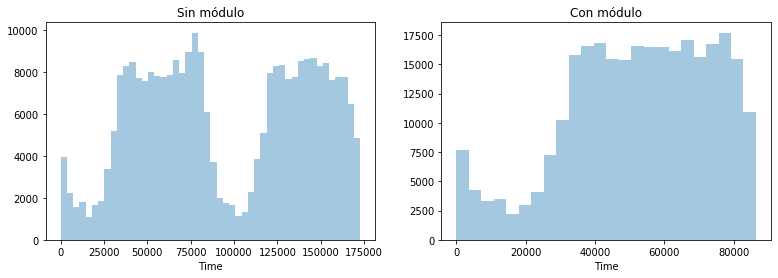

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(13,4))

axs[0].title.set_text("Sin módulo")
sns.distplot(df['Time'], bins=48, kde=False, ax=axs[0])

axs[1].title.set_text("Con módulo")
one_day = 3600 * 24  # Segundos en un día
sns.distplot(df['Time']%one_day, bins=24, kde=False, ax=axs[1])

Viendo los valores de la columna 'Time', en un primer momento podríamos pensar que se distribuyen aleatoriamente, aunque si nos fijamos en el gráfico de la izquierda las operaciones parecen agruparse en dos intervalos distintos que podrían corresponderse con las horas más activas de cada uno de los dos días. Teniendo en cuenta esto y las magnitudes de los valores de esta variable, he deducido que los valores de la columna 'Time' podrían representar los segundos transcurridos desde la primera operación.

Por otro lado, al tener datos de dos días distintos, considero que el día puede no ser tan relevante como la hora/momento del día. De este modo, a cada valor de esta columna le puedo aplicar el módulo de los segundos que tiene un día para agrupar los valores por horas. Cabe destacar que en los dos gráficos de arriba he distribuido las operaciones de tarjeta de crédito en 48 y 24 *bins* respectivamente con el fin de mantener una relación de 1 día = 24 *bins*.

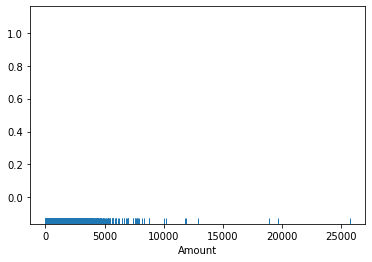

In [7]:
sns.rugplot(df['Amount'])

Si nos fijamos en la media (88.35) de los valores de la columna 'Amount', sus cuartiles: Q1 (5.6), Q2/mediana (22) y Q3 (77.17), y el gráfico de arriba, en el que cada raya marca una operación distinta, observamos que la mayoría de las operaciones de tarjetas de crédito se realizan con cantidades bajas, y que las operaciones con grandes 'amounts' (que las hay) representan menos del 25%.

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Centrándonos en la columna de la clase, vemos como sólo hay 2 valores (0 y 1) y como un 99.82% de los registros en el dataset se corresponden con la clase 0. Se trata entonces de un problema no balanceado, es decir, la clase 0 está sobrerrepresentada en comparación con la clase 1.

Según esta información y suponiendo que las operaciones fraudulentas son las menos comunes, a partir de ahora voy a considerar a la clase 1 como operación fraudulenta.

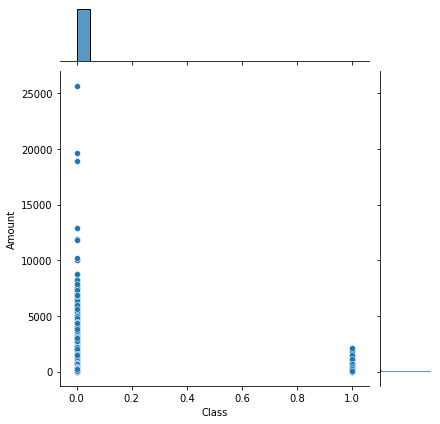

In [9]:
sns.jointplot(x='Class', y='Amount', data=df)

La figura de arriba compara el 'Amount' de las operaciones con la clase en busca de una relación directa entre ambas. A simple vista, de acuerdo con las operaciones de tarjetas de crédito en nuestro dataset, podemos observar como aquellas que operan con grandes cantidades ('Amount'), que recordemos son valores atípicos, no están clasificadas como fraudulentas.

Para ver esto en más detalle con el resto de variables recurro a la matriz de correlación, la cual nos muestra la correlación, negativa o positiva, de cada una de las variables con la clase.

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


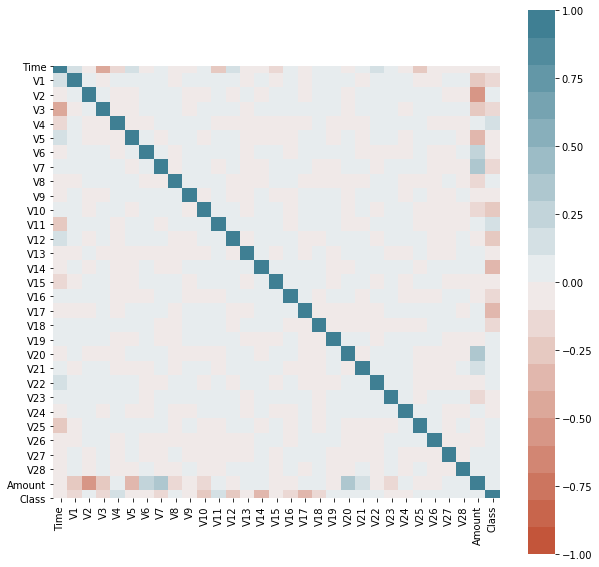

In [13]:
corr = df.corr()

print(corr['Class'])

_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, n=20), square=True, ax=ax)

Con la información de arriba observamos como, por ejemplo, las variables 'Time' y 'Amount' tienen una muy baja correlación con la clase. Sin embargo, otras variables como 'V14' y 'V17' guardan una mayor correlación (negativa) con la clase en comparación con el resto

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Preparación de los datos

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Al buscar valores nulos no encontramos ninguno en el dataset.

In [4]:
from sklearn.preprocessing import RobustScaler

def robust_scaling(df_col):
    aux = df_col.to_numpy().reshape(-1,1)
    return RobustScaler().fit_transform(aux)

In [5]:
def z_score(df_col):
    return (df_col - df_col.mean()) / df_col.std()

In [6]:
def min_max_scaling(df_col):
    return (df_col - df_col.min()) / (df_col.max() - df_col.min())

Cuando hay features/columnas cuyos valores son muy grandes comparados con otras, estos valores pueden alterar el comportamiento de algunos algoritmos de ML.

En este caso he pensado en:
- Escalar el rango de la columna 'Time' a [0, 1] después de aplicar el módulo de los segundos de un día a cada valor.
- Estandarizar los valores de la columna 'Amount'. Sin embargo, los valores atípicos de esta pueden afectar negativamente a la media y la desviación típica. Para superar esto voy a probar una técnica llamada Robust Scaling que usa la mediana y el rango intercuartílico.

In [9]:
### COLUMNA 'TIME' ###

#df_copy = df.drop(columns=['Time'])
df_copy = df.copy()
df_copy['Time'] = df_copy['Time'] % one_day  # Aplicar el módulo de los segundos de un día
df_copy['Time'] = min_max_scaling(df_copy['Time'])

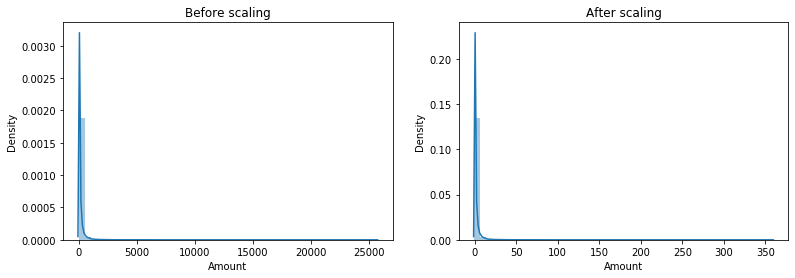

In [10]:
### COLUMNA 'AMOUNT' ###

fig, axs = plt.subplots(1, 2, figsize=(13,4))

axs[0].title.set_text("Before scaling")
#print(df['Amount'].min(), df['Amount'].max())
#print(df['Amount'].mean(), df['Amount'].std())
sns.distplot(df['Amount'], ax=axs[0])

axs[1].title.set_text("After scaling")
df_copy['Amount'] = robust_scaling(df_copy['Amount'])
#print(df_copy['Amount'].min(), df_copy['Amount'].max())
#print(df_copy['Amount'].mean(), df_copy['Amount'].std())
sns.distplot(df_copy['Amount'], ax=axs[1])

En las siguientes celdas vamos a ver si tiene sentido aplicar alguna de estas técnicas con el resto de las columnas.

In [17]:
def plot_V_graphs(col):
    fig, axs = plt.subplots(1, 4, figsize=(17, 3))

    axs[0].title.set_text("Original")
    #print(df[col].min(), df[col].max())
    #print(df[col].mean(), df[col].std())
    sns.distplot(df[col], ax=axs[0])

    axs[1].title.set_text("Z-score")
    aux = z_score(df_copy[col])
    #print(aux.min(), aux.max())
    #print(aux.mean(), aux.std())
    sns.distplot(aux, ax=axs[1])

    axs[2].title.set_text("Min-max")
    aux = min_max_scaling(df_copy[col])
    #print(aux.min(), aux.max())
    #print(aux.mean(), aux.std())
    sns.distplot(aux, ax=axs[2])

    axs[3].title.set_text("Robust scaling")
    aux = robust_scaling(df_copy[col])
    #print(aux.min(), aux.max())
    #print(aux.mean(), aux.std())
    sns.distplot(aux, ax=axs[3])

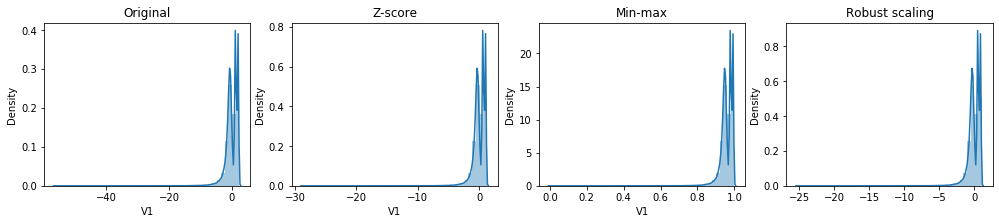

In [18]:
plot_V_graphs('V1')

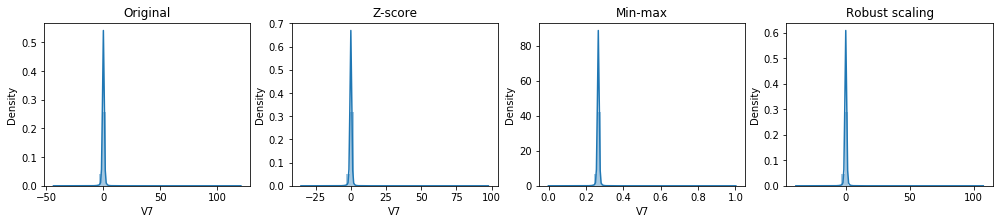

In [19]:
plot_V_graphs('V7')

Observando los gráficos obtenidos para estas dos variables se pueden realizar las siguientes afirmaciones:
- *Z-score* no cambia mucho los valores debido a que estas variables ya siguen una distribución normal de media 0 y desviación típica cercana a 1.
- Lo mismo acurre con *Robust scaling*, el único efecto que consigue este método es reducir ligeramente los valores atípicos.
- *Min-max scaling* parece desvirtuar los valores de las variables concentrándolos en el 0 o 1 según los valores atípicos sean positivos o negativos respectivamente.

De este modo, he llegado a la conclusión de no escalar ni modificar la distribución de las variables V1,...,V28.

In [11]:
df_copy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000012,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000012,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000023,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999861,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999873,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999884,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999884,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


Otra propuesta podría ser trabajar únicamente con aquellas columnas que guardan una mayor correlación con la clase. Con esta idea creamos el siguiente DataFrame con aquellas variables cuya correlación con la clase tenga un valor absoluto mayor que 0.15.

In [14]:
columns = [col for col in df.columns if abs(corr['Class'][col]) > 0.15]
corr_df = df[columns]
corr_df.head()

,V3,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Predicción

In [15]:
import tensorflow as tf

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Ya que el dataset contiene la clase de cada operación podemos aplicar algoritmos de **aprendizaje supervisado**, los cuales se basan en encontrar la relación entre unas variables de entrada y unas variables de salida. Dicho de otro modo, el aprendizaje se consigue mostrando a los algoritmos el resultado deseado con unos determinados valores de entrada.

Lo primero que voy a hacer es extraer la clase de cada uno de los dos DataFrames que tenemos.

In [16]:
target = df_copy['Class']
target_corr = corr_df['Class']

input_data = df_copy.drop(columns=['Class'])
input_data_corr = corr_df.drop(columns=['Class'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Neural network model

El primer algoritmo que voy a probar es una red neuronal profunda con 2 *hidden layers* y una única variable de salida a la que se le aplica la función de activación "sigmoid" (la misma que en una regresión logística). Esta función devuelve la probabilidad (entre 0 y 1) de que ocurra un evento, en este caso la probabilidad de que haya fraude.

También aplico "*Dropout*" como una técnica de regularización que consiste en poner a 0 (*dropping out*) aleatoriamente un porcentaje de las variables de salida de una capa, en este caso un 20%. Esto se hace únicamente durante el entrenamiento del modelo.

De este modo, divido el dataset en tres conjuntos que mantengan la misma proporción de clases (*stratification*), utilizando un 70% del dataset original para entrenar el modelo y un 15% para los datos validación y evaluación respectivamente. 

In [24]:
X_train, X_aux, y_train, y_aux = train_test_split(input_data, target, stratify=target, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, stratify=y_aux, test_size=0.5)

In [25]:
def create_NN_model(train_data):
    input_dim = train_data.shape[1]
    print(f"Variables de entrada: {input_dim}")

    new_model = tf.keras.Sequential([
        layers.Dense(16, input_dim=input_dim, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation="sigmoid")
    ])

    new_model.compile(
        loss=losses.BinaryCrossentropy(from_logits=True),  # Ya que se trata de un problema de clasificacion binario
        optimizer='adam',
        metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

    return new_model

In [26]:
nn_model = create_NN_model(X_train)
nn_model.summary()

Variables de entrada: 30
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,129
Trainable params: 2,129
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = nn_model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
6231/6231 [==============================] - 9s 1ms/step - loss: 0.6950 - binary_accuracy: 0.9966 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 2/5
6231/6231 [==============================] - 8s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 3/5
6231/6231 [==============================] - 8s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 4/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 5/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983


In [28]:
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(loss, accuracy)

1336/1336 [==============================] - 1s 607us/step - loss: 0.6932 - binary_accuracy: 0.9983
0.6931594610214233 0.9982678890228271


In [29]:
y_pred = nn_model.predict(X_test)
y_pred = np.round(y_pred)  # Class 0: <= 0.5 | Class 1: > 0.5

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     42648
      Fraude       0.00      0.00      0.00        74

    accuracy                           1.00     42722
   macro avg       0.50      0.50      0.50     42722
weighted avg       1.00      1.00      1.00     42722



array([[42648,     0],
       [   74,     0]])

Si nos fijamos únicamente en el valor de la "*accuracy*" podríamos pensar que nuestro modelo tiene un muy buen rendimiendo. Sin embargo, como podemos ver en el "*classification report*" y la "*confusion matrix*", estos resultados son engañosos.

Debido a que la clase 0 ("No fraude") está sobrerrepresentada en nuestra muestra, es decir, las clases no están balanceadas, el modelo ha aprendido a predecir cualquier operación como "No fraude" obteniendo así una "*accuracy*" del 99.83%. Por lo tanto, este modelo no soluciona el problema ya que no sirve para encontrar las operaciones fraudulentas que es, en realidad, nuestro objetivo.

In [30]:
X_train, X_aux, y_train, y_aux = train_test_split(input_data_corr, target_corr, stratify=target_corr, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, stratify=y_aux, test_size=0.5)

nn_model = create_NN_model(X_train)

history = nn_model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=5)
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(loss, accuracy)

y_pred = nn_model.predict(X_test)
y_pred = np.round(y_pred)  # Class 0: <= 0.5 | Class 1: > 0.5

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

Variables de entrada: 8
Epoch 1/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6947 - binary_accuracy: 0.9979 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 2/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 3/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 4/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - binary_accuracy: 0.9983 - val_loss: 0.6932 - val_binary_accuracy: 0.9983
Epoch 5/5
1336/1336 [==============================] - 1s 641us/step - loss: 0.6932 - binary_accuracy: 0.9983
0.6931594610214233 0.9982678890228271
              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     42648
      Fraude       0.00      0.00      0.00        74

    accuracy                        

array([[42648,     0],
       [   74,     0]])

Vemos como con el segundo DataFrame (el que sólo tiene las variable más correlacionadas con la clase) ocurre exactamente lo mismo.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Logistic regression

En este aparatado pruebo el algoritmo de regresión logística, un método de ML muy usado en la predicción de clases binarias, como es nuestro caso. Este método proporciona un resultado discreto a partir de la función *sigmoid*.

Sabiendo que el valor de la *accuracy* no es muy fiable para este problema, nos centraremos en el "informe de clasificación" y en la "matriz de confusión" para evaluar el rendimiento del modelo.

El informe de clasificación contiene algunas métricas interesantes como la *precision*, que representa la proporción de casos clasificados como positivos que realmente lo son, el *recall* (exhaustividad), que representa la cantidad/fracción de los casos positivos que el modelo es capaz de clasificar correctamente, y el *f1-score*, que combina las dos medidas anteriores en un solo valor asumiendo que tienen la misma importancia.

Por otro lado, la matriz de confusión nos permite ver cómo se han clasificado las operaciones de cada clase ("No fraude" y "Fraude"). De aquí podemos extraer información como el número de *verdaderos positivos* (TP), *falsos positivos* (FP), *verdaderos negativos* (TN) y *falsos negativos* (FN), los cuales sirven para calcular la *precision* y el *recall*.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2, random_state=1, stratify=target)

In [32]:
lg_model = LogisticRegression().fit(X_train, y_train)
y_pred = lg_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.86      0.70      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



array([[56853,    11],
       [   29,    69]])

Después de ejecutar el modelo observamos como ahora no todas las operaciones se clasifican como "No fraude", y los valores de la *precision* y el *recall* para la clase "Fraude" son 0.86 y 0.70 respectivamente.

**Para este problema es más importante el _recall_ que la _precision_**, ya que es mejor detectar la mayoría de las operaciones fraudulentas, aunque esto conlleve aumentar los falsos positivos, que tener una gran precisión en nuestras prediciones a costa de saltarnos una gran parte de las operaciones fraudulentas.

In [18]:
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(input_data_corr, target_corr, test_size=0.2, random_state=1, stratify=target_corr)

In [34]:
lg_model = LogisticRegression().fit(X_train_corr, y_train_corr)
y_pred_corr = lg_model.predict(X_test_corr)

print(classification_report(y_test_corr, y_pred_corr, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test_corr, y_pred_corr)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.91      0.64      0.75        98

    accuracy                           1.00     56962
   macro avg       0.96      0.82      0.88     56962
weighted avg       1.00      1.00      1.00     56962



array([[56858,     6],
       [   35,    63]])

Arriba vemos como si utilizamos el segundo DataFrame obtenemos un comportamiento similar.

### Estrategia: Penalización

Una primera estrategia para intentar ajustar el rendimiento de nuestro modelo a nuestro gusto puede ser la aplicación de una penalización o coste adicional por los errores de clasificación en la clase minoritaria durante la fase de entrenamiento. Esto puede hacer que el modelo ponga más atención a la clase menos representada.

Según la documentación de Scikit-learn, el modo "balanceado" usa los valores de 'y' para ajustar automaticamente los parámetros (weights) del modelo de manera inversamente proporcional a la frecuencia de clases en los datos de entrada.

In [35]:
lg_model_balanced = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
y_pred = lg_model_balanced.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.98      0.99     56864
      Fraude       0.06      0.93      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



array([[55455,  1409],
       [    7,    91]])

En este caso, observamos como el valor del *recall* para la clase "Fraude" ha aumentado hasta el 0.93, ya que de un total de 98 operaciones fraudulentas sólo 7 han sido falsos negativos. Como aspecto negativo, un "pequeño" porcentaje (~2.5%) de las operaciones no fraudulentas han sido clasificadas como "Fraude", disminuyendo en gran medida la precisión de la clase "Fraude". Sin embargo, como ya hemos dicho antes, esta situación es más conveniente para este problema.

In [36]:
lg_model_balanced = LogisticRegression(class_weight='balanced').fit(X_train_corr, y_train_corr)
y_pred_corr = lg_model_balanced.predict(X_test_corr)

print(classification_report(y_test_corr, y_pred_corr, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test_corr, y_pred_corr)

              precision    recall  f1-score   support

   No fraude       1.00      0.98      0.99     56864
      Fraude       0.06      0.91      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



array([[55485,  1379],
       [    9,    89]])

De nuevo, utilizando el segundo DataFrame el comportamiento es similar a cuando utilizamos el primero.

### Estrategia:  Modificar el dataset para tener las clases más balanceadas

Podemos probar dos estrategias diferentes: una sería añadir copias de operaciones (registros) de la clase menos representada (*over-sampling*) y la otra, eliminar operaciones de la clase sobrerepresentada (*under-sampling*).

En relación a la primera, hay que tener en cuenta que esta estrategia puede incrementar las posibilidades de sufrir *overfitting* ya que estamos rellenando el *dataset* con duplicados, lo que podría resultar en una menor capacidad de generalización del modelo. Vamos a ver los resultados que obtenemos si aplicamos **_over-sampling_** en el primer DataFrame.

In [19]:
X_ros, y_ros = RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_ros.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    227451
1    113725
Name: Class, dtype: int64


In [38]:
lg_model_ros = LogisticRegression().fit(X_ros, y_ros)
y_pred = lg_model_ros.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.99      0.99     56864
      Fraude       0.11      0.92      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



array([[56166,   698],
       [    8,    90]])

Con esta estrategia podemos ver como el *recall* mantiene aproximadamente el mismo valor que con la estrategia anterior, aunque en este caso la precisión es mayor, lo cual supone una ligera mejoría.

Después de realizar algunas pruebas con distintos valores he notado que al aumentar la proporción del número de operaciones fraudulentas en relación con las no fraudulentas (el parémetro "*sampling_strategy*"), el *recall* también aumenta mientras que la precisión disminuye, acercándose así al comportamiento obtenido con la estrategia de penalización. Lo mismo ocurre a la inversa.

Vamos a probar ahora aplicando la técnica de **_under-sampling_** (también en el primer DataFrame).

In [20]:
X_rus, y_rus = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_rus.value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    788
1    394
Name: Class, dtype: int64


In [40]:
lg_model_rus = LogisticRegression().fit(X_rus, y_rus)
y_pred = lg_model_rus.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.98      0.99     56864
      Fraude       0.09      0.93      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



array([[55892,   972],
       [    7,    91]])

Manteniendo la misma proporción de las clases que en la estrategia anterior, observamos como el *recall* se mantiene más o menos igual. Sin embargo, el número de falsos positivos para la clase "Fraude" ha pasado de 698 a 972 en comparación la técnica de *over-sampling*.

Ahora, vamos a probar estas dos estrategias con el segundo DataFrame.

In [41]:
### OVER-SAMPLING ###

X_ros_corr, y_ros_corr = RandomOverSampler(sampling_strategy=0.5).fit_resample(X_train_corr, y_train_corr)

lg_model_ros = LogisticRegression().fit(X_ros_corr, y_ros_corr)
y_pred_corr = lg_model_ros.predict(X_test_corr)

print(classification_report(y_test_corr, y_pred_corr, target_names=["No fraude", "Fraude"]))
print(confusion_matrix(y_test_corr, y_pred_corr))

### UNDER-SAMPLING ###

X_rus_corr, y_rus_corr = RandomUnderSampler(sampling_strategy=0.5).fit_resample(X_train_corr, y_train_corr)

lg_model_rus = LogisticRegression().fit(X_rus_corr, y_rus_corr)
y_pred_corr = lg_model_rus.predict(X_test_corr)

print(classification_report(y_test_corr, y_pred_corr, target_names=["No fraude", "Fraude"]))
print(confusion_matrix(y_test_corr, y_pred_corr))

              precision    recall  f1-score   support

   No fraude       1.00      0.99      0.99     56864
      Fraude       0.11      0.91      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962

[[56136   728]
 [    9    89]]
              precision    recall  f1-score   support

   No fraude       1.00      0.99      0.99     56864
      Fraude       0.12      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

[[56231   633]
 [    9    89]]


Viendo como el segundo DataFrame no afecta significativamente al rendimiento del modelo a partir de aquí trabajaré únicamente con el primero, que contiene todas las variables después de escalar la columna 'Time' y 'Amount'.

A continuación pruebo otros algoritmos de aprendizaje supervisado con el objetivo de ver si alguno de ellos mejora el rendimiento del algoritmo de regresión logística.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Decision tree

Este algoritmo consiste en representar un modelo en forma de árbol compuesto por nodos y hojas.

In [42]:
dt_model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.72      0.81      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



array([[56833,    31],
       [   19,    79]])

#### Penalización

In [43]:
dt_model = DecisionTreeClassifier(random_state=1, class_weight='balanced').fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.77      0.84      0.80        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962



array([[56840,    24],
       [   16,    82]])

#### Over-sampling

In [44]:
dt_model = DecisionTreeClassifier(random_state=1).fit(X_ros, y_ros)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.73      0.87      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



array([[56833,    31],
       [   13,    85]])

#### Under-sampling

In [45]:
dt_model = DecisionTreeClassifier(random_state=1).fit(X_rus, y_rus)
y_pred = dt_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.94      0.97     56864
      Fraude       0.03      0.93      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.51     56962
weighted avg       1.00      0.94      0.97     56962



array([[53371,  3493],
       [    7,    91]])

Observando los resultados obtenidos con este algoritmos podemos concluir lo siguiente:
- Comparando el algoritmo de árboles de decisión con el de regresión logística, sin aplicar ninguna modificación a los datasets, el primero parece comportarse un poco mejor.
- Las estrategias de penalización y *over-sampling* en este algoritmo resultan en un comportamiento similar al primer caso en el que aplicamos el algoritmo tal cual.
- Sólo la estrategia de *under-sampling* produce unos resultados diferentes al primer caso, aumentando el *recall* hasta 0.93 y reduciendo en gran medida la *precision* a un 0.03.
- Comparando estos resultados con los obtenidos con regresión logística no parece haber una mejora clara.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Random forest

Este algoritmo crea un "bosque" a partir de múltiples árboles de decisión. Para clasificar una nueva observación cada *decision tree* devuelve una predicción (una clase) y luego el algoritmo elige la clase con mayor número de votos de *decision trees*. Por lo general, cuantos más árboles más robusta será la predicción.

In [46]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=1).fit(X_train, y_train)  # n_estimators: The number of trees in the forest
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56857,     7],
       [   16,    82]])

#### Penalización

In [47]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=1, class_weight='balanced').fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.92      0.84      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56857,     7],
       [   16,    82]])

#### Over-sampling

In [48]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=1).fit(X_ros, y_ros)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.92      0.85      0.88        98

    accuracy                           1.00     56962
   macro avg       0.96      0.92      0.94     56962
weighted avg       1.00      1.00      1.00     56962



array([[56857,     7],
       [   15,    83]])

#### Under-sampling

In [49]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=1).fit(X_rus, y_rus)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.99      1.00     56864
      Fraude       0.14      0.92      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962



array([[56311,   553],
       [    8,    90]])

Después de ver los resultados obtenidos con este algoritmo se puede afirmar lo siguiente:
- El algoritmo de *random forest* mejora en todos los casos al anterior algoritmo (*decision tree*), lo cual tiene lógica al tratarse de un algoritmo más sofisticado que basa sus predicciones en varios árboles de decisión.
- Los resultados obtenidos con la estrategia de *under-sampling* en este algoritmo (precision: 0.14, recall: 0.92) se asemejan, e incluso superan ligeramente, a los obtenidos con la estrategia de *over-sampling* en el algoritmo de regresión logística (precision: 0.11, recall: 0.92).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Support Vector Machine

Este algoritmo consiste en encontrar el hiperplano que mejor separa dos clases. El objetivo es maximizar la distancia (margen) entre el hiperplano/línea y los puntos más cercanos a ambos lados. Algunas de sus ventajas que podemos aprovechar para nuestro problema son: su efectividad en espacios con muchas dimensiones (variables) o la posibilidad de trabajar con problemas desbalanceados.

In [50]:
svm_model = SVC(random_state=1).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.92      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



array([[56857,     7],
       [   19,    79]])

#### Penalización

In [51]:
svm_model = SVC(random_state=1, class_weight='balanced').fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      1.00      1.00     56864
      Fraude       0.30      0.85      0.45        98

    accuracy                           1.00     56962
   macro avg       0.65      0.92      0.72     56962
weighted avg       1.00      1.00      1.00     56962



array([[56674,   190],
       [   15,    83]])

#### Over-sampling

In [21]:
svm_model = SVC(random_state=1).fit(X_ros, y_ros)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.99      1.00     56864
      Fraude       0.22      0.91      0.35        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.67     56962
weighted avg       1.00      0.99      1.00     56962



array([[56546,   318],
       [    9,    89]])

#### Under-sampling

In [22]:
svm_model = SVC(random_state=1).fit(X_rus, y_rus)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["No fraude", "Fraude"]))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

   No fraude       1.00      0.99      1.00     56864
      Fraude       0.14      0.91      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962



array([[56329,   535],
       [    9,    89]])

Conclusiones finales después de ejecutar todos los algoritmos:
- El algoritmo SVM consigue muy buenos resultados, similares a los obtenidos con regresión logística, e incluso los supera en algunos casos.
- Los resultados obtenidos con la estrategia de *over-sampling* en este algoritmo (precision: 0.22, recall: 0.91) son los mejores hasta el momento entre todos los algoritmos, ya que conseguimos mantener una buena puntuación en *recall* (exhaustividad) y, al mismo tiempo, aumentar la *precision*.
- En cuanto a las estrategias implementadas en este trabajo para tratar de suplir el problema de la clase no balanceada, la penalización no consigue generalmente tan buenos resultados como las otras dos técnicas. Además, parece que la estrategia de *over-sampling* funciona mejor en el algoritmo de regresión logística y SVM, mientras que en el caso del *decision tree* y el *random forest* la estrategia que mejores resultados produce es la de *under-sampling*.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Clustering

Otro enfoque que le podemos dar a la resolución de este problema es la aplicación de algoritmos de **aprendizaje no supervisado**. Este tipo de algoritmos tratan de obtener conocimientos únicamente a partir de los valores de entrada sin necesidad del resultado deseado.

Para este apartado me he basado en el artículo del siguiente enlace: https://towardsdatascience.com/best-clustering-algorithms-for-anomaly-detection-d5b7412537c8. En esta página se presentan algunos algoritmos que podrían tener un mejor rendimiento aplicados a la detección de anomalias, como es nuestro caso. Nuestro dataset contiene una serie de operaciones de tarjetas de crédito entre las cuales sólo un 0.18% de ellas está catalogada como "Fraude". Así, podemos afirmar que, dentro de nuestro dataset, las operaciones fraudulentas son anomalias.

El primer algoritmo que menciona es **DBSCAN**. Este algoritmo busca áreas con una alta densidad de registros asignandoles *clusters*. Mientras que, por otro lado, los puntos que se encuentran en regiones menos densas no se incluyen en ningún *cluster* y quedan etiquetados como anomalías.

Para medir el rendimiento en este aparatado voy a usar el *homogeneity_score*, que indica el porcentaje de puntos/operaciones que están agrupadas con miembros de su misma clase. El valor óptimo de esta métrica es 1, ya que significaría que todos los *clusters* continen puntos de una misma y única clase.

In [23]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import homogeneity_score

Con el objetivo de reducir los tiempos de ejecución, voy a entrenar los modelos con una pequeña fracción de las operaciones incluidas en nuestro dataset. Además, en este apartado voy a utilizar el dataset con las variables escaladas/normalizadas y el dataset con las variables que guardan una mayor correlación con la clase.

In [24]:
df_lite = df_copy.sample(frac=0.1, random_state=0)
df_lite['Class'].value_counts()

0    28426
1       55
Name: Class, dtype: int64

In [25]:
df_lite_corr = corr_df.sample(frac=0.1, random_state=0)
df_lite_corr['Class'].value_counts()

0    28426
1       55
Name: Class, dtype: int64

In [26]:
target_lite = df_lite.pop('Class')
target_lite_corr = df_lite_corr.pop('Class')

In [27]:
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

estimator = DBSCAN(eps=5, min_samples=7, n_jobs=-1).fit(df_lite)
print(f"Clusters encontrados: {np.unique(estimator.labels_)}")
homogeneity_score(target_lite.values, estimator.labels_)

Clusters encontrados: [-1  0]


0.39275000962712553

Después de probar distintas combinaciones para los parámetros 'eps' y 'min_samples', (eps=5, min_samples=7) ofrece unos resultados bastante "realistas" en comparación con otras como (eps=5, min_samples=1) que, aunque su "valor de homogeneidad" sea casi 0.84, genera 560 *clusters* distintos y no parece detectar anomalías (no incluye el cluster -1). Hay que tener en cuenta que cuantos más *clusters* se generan mayor será el "valor de homogeneidad", lo cual puede resultar engañoso.

A continuación voy a probar el mismo algoritmo con el segundo dataset, el de las variables más correlacionadas con la clase.

In [28]:
estimator_corr = DBSCAN(eps=5, min_samples=5, n_jobs=-1).fit(df_lite_corr)
print(f"Clusters encontrados: {np.unique(estimator_corr.labels_)}")
homogeneity_score(target_lite_corr.values, estimator_corr.labels_)

Clusters encontrados: [-1  0  1]


0.6754698226044322

Vemos como en este caso sí hemos conseguido mejorar el rendimiento del algoritmo DBSCAN al pasarle un dataset más reducido, consiguiendo casi un 0.3 más en el "valor de homogeneidad". Lo cual indicaría que este modelo es más fiable a la hora de detectar operaciones fraudulentas (anomalías).

Para finalizar, el primer algoritmo de clusterización en el que pensé fue **K-Means**. Sin embargo, en el artículo de arriba se dice que este algoritmo no encaja bien en este tipo de problemas. La principal razón es que K-Means funciona mejor cuando se espera que los *clusters* tengan "formas" regulares. Otra razón es que todos los puntos quedan incluidos en *clusters* y así, las anomalías que haya formarán parte de algunos de ellos, afectando a sus centroides y, especialmente, a su radio. Esto puede provocar que sea más dificil detectar anomalías en los casos de prueba/evaluación.

In [29]:
estimator = KMeans(n_clusters=2, max_iter=50000, random_state=1).fit(df_lite)
homogeneity_score(target_lite.values, estimator.labels_)

0.0014980494749532586

In [30]:
estimator_corr = KMeans(n_clusters=2, max_iter=50000, random_state=1).fit(df_lite_corr)
homogeneity_score(target_lite_corr.values, estimator_corr.labels_)

0.09164955780193869

Como ya advertía el artículo, el algoritmo K-Means ofrece bastante peor rendimiento que el algoritmo DBSCAN para este tipo de problemas.